In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dt = 10
coefficient = 0.03

In [3]:
rates = pd.Series([100,90,88,84,80,74,68,60,50,48,46,44,40,34,30,28,26,24,22,20,18,12,10,6])

In [4]:
rates

0     100
1      90
2      88
3      84
4      80
5      74
6      68
7      60
8      50
9      48
10     46
11     44
12     40
13     34
14     30
15     28
16     26
17     24
18     22
19     20
20     18
21     12
22     10
23      6
dtype: int64

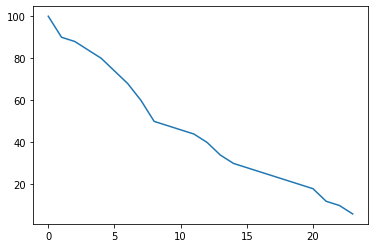

In [5]:
plt.plot(rates)

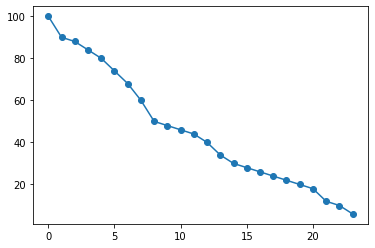

In [6]:
plt.scatter(rates.index, rates)
plt.plot(rates)

In [7]:
rates.values.mean()


45.916666666666664

In [8]:
rates.values

array([100,  90,  88,  84,  80,  74,  68,  60,  50,  48,  46,  44,  40,
        34,  30,  28,  26,  24,  22,  20,  18,  12,  10,   6])

In [9]:
rates.keys()

RangeIndex(start=0, stop=24, step=1)

In [10]:
def approximate(records, startpoint=0):
    m_x, m_y = len(records)/2, records.values.mean()
    print(m_x, m_y)
    b = (sum((xi-m_x)*(yi-m_y) for xi,yi in enumerate(records))/(sum((xi-m_x)**2 for xi in range(len(records)))))
    a = m_y - b*m_x
    return lambda x: a + b*x

In [11]:
linear = approximate(rates)

12.0 45.916666666666664


In [12]:
#plt.plot(rates.keys(), np.array([linear(x) for x in np.arange(0, len(rates), 0.5)]))

In [13]:
linear(5)

73.34140715109572

(0.0, 23.0)

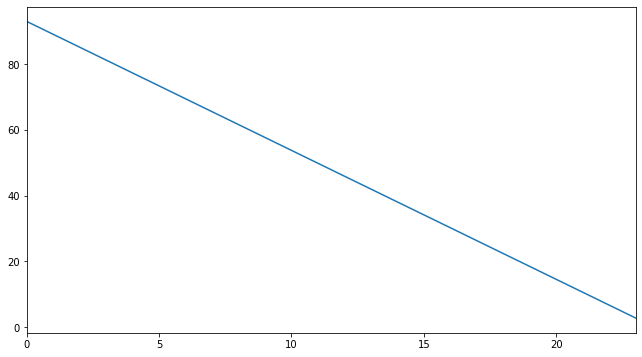

In [14]:
fig = plt.figure(figsize=(24, 6))
ax = fig.add_subplot(121)
ax.plot([x for x in rates.keys()], [linear(x) for x in rates.keys()])
ax.set_xlim([0,len(rates)-1])

1.0 92.66666666666667
-6.0x+98.66666666666667
1.0 87.33333333333333
-3.0x+90.33333333333333
1.0 84.0
-4.0x+88.0
1.0 79.33333333333333
-5.0x+84.33333333333333
1.0 74.0
-6.0x+80.0
1.0 67.33333333333333
-7.0x+74.33333333333333
1.0 59.333333333333336
-9.0x+68.33333333333334
1.0 52.666666666666664
-6.0x+58.666666666666664
1.0 48.0
-2.0x+50.0
1.0 46.0
-2.0x+48.0
1.0 43.333333333333336
-3.0x+46.333333333333336
1.0 39.333333333333336
-5.0x+44.333333333333336
1.0 34.666666666666664
-5.0x+39.666666666666664
1.0 30.666666666666668
-3.0x+33.66666666666667
1.0 28.0
-2.0x+30.0
1.0 26.0
-2.0x+28.0
1.0 24.0
-2.0x+26.0
1.0 22.0
-2.0x+24.0
1.0 20.0
-2.0x+22.0
1.0 16.666666666666668
-4.0x+20.666666666666668
1.0 13.333333333333334
-4.0x+17.333333333333336
21 24 3
1.0 9.333333333333334
-3.0x+12.333333333333334


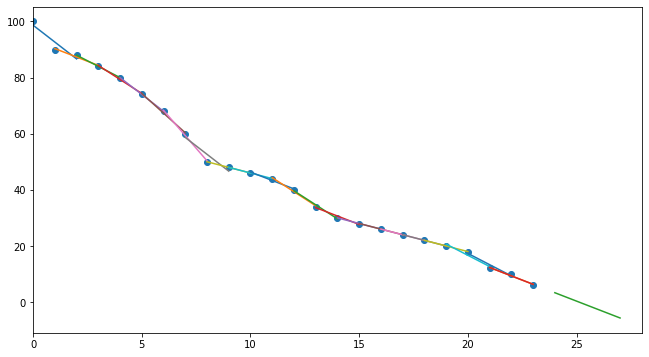

In [15]:
figs = plt.figure(figsize=(24, 6))
ax = figs.add_subplot(121)
predict_diap = 4
ax.set_xlim([0,len(rates) + predict_diap])
N = len(rates)
current = 0

step = 3


def approximate(records):
    m_x, m_y = sum(range(len(records)))/len(records), records.values.mean()
    print(m_x, m_y)
    b = (sum((xi-m_x)*(yi-m_y) for xi,yi in enumerate(records))/(sum((xi-m_x)**2 for xi in range(len(records)))))
    a = m_y - b*m_x
    print(f"{b}x+{a}")
    return lambda x: a + b*x

while current + step < N:
    cur_linear = approximate(rates[current:current+step])
    ax.plot([x for x in range(current, current+step)], [cur_linear(x) for x in range(0, step)])
    current += 1

last_step = N-current
print('====================')
print(current, N, last_step)
print('====================')
if last_step:
    last_linear = approximate(rates[current:current+last_step])
    ax.plot([x for x in range(current, current+last_step)], [last_linear(x) for x in range(0, last_step)])
    
    ax.plot([x for x in range(N, N+predict_diap)], [last_linear(x) for x in range(last_step, last_step+predict_diap)])
    
else:
    ax.plot([x for x in range(N, N+predict_diap)], [cur_linear(x) for x in range(step, step+predict_diap)])
ax.scatter(rates.index, rates)
#ax.plot(rates)

ax.plot([x for x in range(current, current+last_step)], [last_linear(x) for x in range(0, last_step)])
    